In [1]:
# Write a program to apply the dimensionality reduction method 
# of PCA, FA and LDA on the given dataset. Find explained variance 
# and visualize the principal components.

In [2]:
# Dataset: wisc_bc_data.csv
# Location: https://mitu.co.in/dataset

### Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [6]:
df = pd.read_csv('wisc_bc_data.csv')

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.shape

(569, 32)

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Separate the input and output data

In [11]:
# input 
x = df.drop(['id','diagnosis'], axis = 1)

# output 
y = df['diagnosis']

In [12]:
x.shape

(569, 30)

In [13]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [14]:
x.min(), x.max()

(radius_mean                  6.981000
 texture_mean                 9.710000
 perimeter_mean              43.790000
 area_mean                  143.500000
 smoothness_mean              0.052630
 compactness_mean             0.019380
 concavity_mean               0.000000
 concave points_mean          0.000000
 symmetry_mean                0.106000
 fractal_dimension_mean       0.049960
 radius_se                    0.111500
 texture_se                   0.360200
 perimeter_se                 0.757000
 area_se                      6.802000
 smoothness_se                0.001713
 compactness_se               0.002252
 concavity_se                 0.000000
 concave points_se            0.000000
 symmetry_se                  0.007882
 fractal_dimension_se         0.000895
 radius_worst                 7.930000
 texture_worst               12.020000
 perimeter_worst             50.410000
 area_worst                 185.200000
 smoothness_worst             0.071170
 compactness_worst       

In [16]:
set(y)

{'B', 'M'}

In [17]:
import numpy as np
np.unique(y)

array(['B', 'M'], dtype=object)

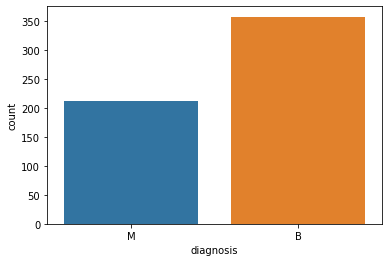

In [20]:
sns.countplot(x=y);

In [21]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Normalize the data

In [23]:
temp = df.iloc[:,1:4]

In [25]:
temp.head()

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


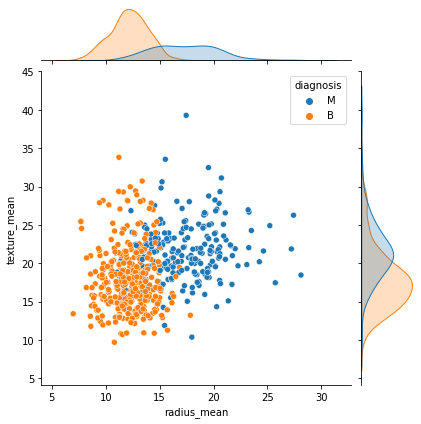

In [26]:
sns.jointplot(x='radius_mean', y='texture_mean',hue='diagnosis',
             data = temp)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [32]:
temp_min = scaler.fit_transform(temp[['texture_mean','radius_mean']])

In [33]:
temp_min

array([[0.0226581 , 0.52103744],
       [0.27257355, 0.64314449],
       [0.3902604 , 0.60149557],
       ...,
       [0.62123774, 0.45525108],
       [0.66351031, 0.64456434],
       [0.50152181, 0.03686876]])

In [35]:
temp_min[:,0].min(), temp_min[:,1].min()

(0.0, 0.0)

In [36]:
temp_min[:,0].max(), temp_min[:,1].max()

(1.0, 1.0)

In [38]:
temp_min = pd.DataFrame(temp_min)
temp_min['y'] = temp['diagnosis']

In [40]:
temp_min.head()

,0,1,y
0,0.022658,0.521037,M
1,0.272574,0.643144,M
2,0.390260,0.601496,M
3,0.360839,0.210090,M
4,0.156578,0.629893,M


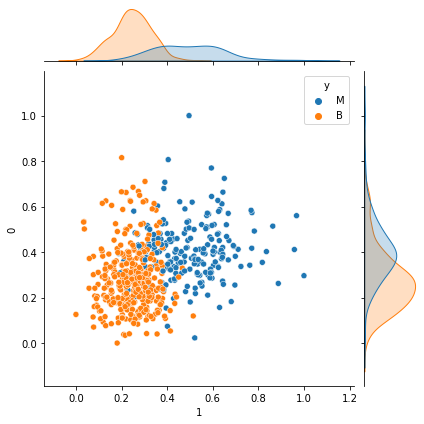

In [43]:
sns.jointplot(x=1, y=0,hue='y', data = temp_min)

### Standardize the data

In [45]:
temp = df.iloc[:,1:4]

In [46]:
temp.head()

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp_std = scaler.fit_transform(temp[['texture_mean','radius_mean']])

In [50]:
temp.std()

radius_mean     3.524049
texture_mean    4.301036
dtype: float64

In [52]:
temp_std[:,0].std(),temp_std[:,1].std() 

(1.0000000000000002, 1.0)

In [53]:
temp_std = pd.DataFrame(temp_std)
temp_std['y'] = temp['diagnosis']

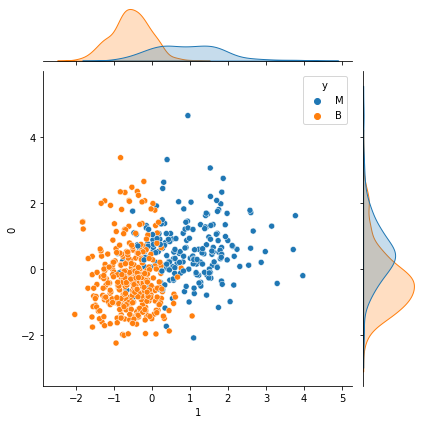

In [54]:
sns.jointplot(x=1, y=0,hue='y', data = temp_std)

In [55]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
scaler = MinMaxScaler()

In [57]:
x_scaled = scaler.fit_transform(x)

In [59]:
x_scaled.shape

(569, 30)

In [61]:
x_scaled[:,4].max()

1.0

### Build the PCA Object

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA()

In [65]:
x_pca = pca.fit_transform(x_scaled)

In [66]:
x_pca

array([[ 1.38702121e+00,  4.26895326e-01, -5.41702643e-01, ...,
        -4.32549684e-03,  6.22252173e-03, -7.89493087e-03],
       [ 4.62308252e-01, -5.56946737e-01, -2.05174584e-01, ...,
         4.21874852e-03, -4.08391804e-04, -3.18067200e-04],
       [ 9.54621472e-01, -1.09701150e-01, -1.47848400e-01, ...,
         5.06868456e-03,  9.53573946e-04,  1.17674556e-04],
       ...,
       [ 2.26311313e-01, -2.87945766e-01,  3.15224024e-01, ...,
        -2.32110439e-04,  1.01657932e-03,  6.30851735e-04],
       [ 1.67783369e+00,  3.35945955e-01,  2.96116006e-01, ...,
        -8.38037637e-03, -1.35651474e-02, -3.93064355e-03],
       [-9.05068041e-01, -1.04108746e-01,  3.82859921e-01, ...,
        -1.33298266e-04, -8.83068730e-03, -3.23670540e-03]])

In [67]:
x_pca.shape

(569, 30)

In [68]:
pca.explained_variance_ratio_

array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
       4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
       9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
       6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
       1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
       9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
       4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
       2.88966877e-05, 5.96453235e-06])

### Visualize the variance

<BarContainer object of 30 artists>

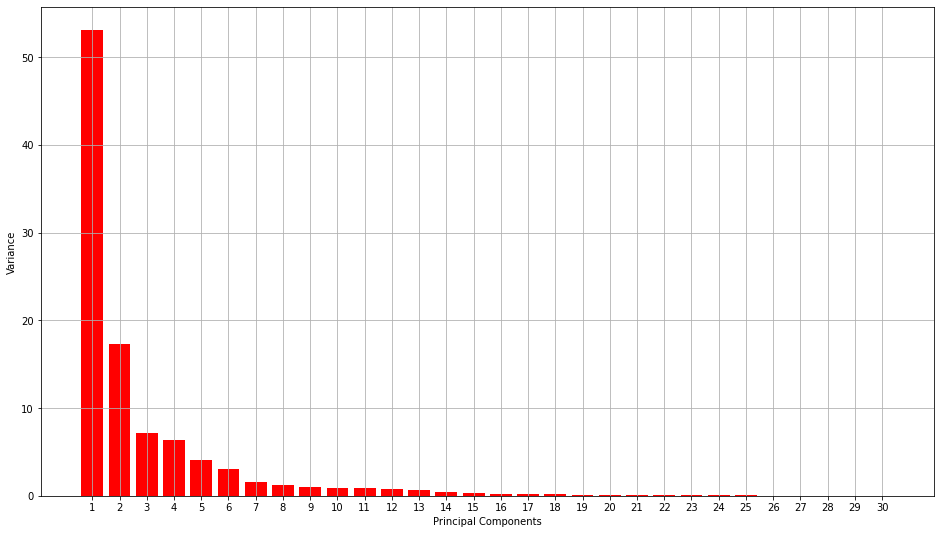

In [74]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.xticks(range(1,31))
plt.bar(range(1,31), pca.explained_variance_ratio_*100, color='r')

### Extract n principal components

In [76]:
pca = PCA(n_components=2)

In [77]:
x_pca = pca.fit_transform(x)

In [78]:
x_pca.shape

(569, 2)

In [79]:
x_pca

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [80]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

### Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [86]:
y;

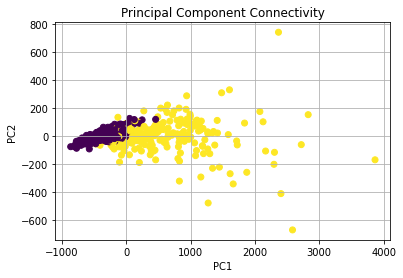

In [87]:
plt.title('Principal Component Connectivity')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0], x_pca[:,1],c=y)

### Factor Analysis

In [89]:
from sklearn.decomposition import FactorAnalysis

In [90]:
fa = FactorAnalysis(n_components=2)

In [91]:
x_fa = fa.fit_transform(x_scaled)

In [92]:
x_fa.shape

(569, 2)

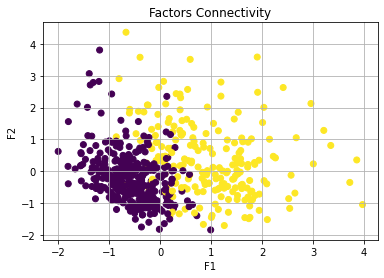

In [93]:
plt.title('Factors Connectivity')
plt.grid()
plt.xlabel('F1')
plt.ylabel('F2')
plt.scatter(x_fa[:,0], x_fa[:,1],c=y)